# **TRAIN CODE**

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set dataset path
dataset_path = '/content/drive/MyDrive/PlantDisease/potato'  # Update this if needed

# Image settings
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data loading
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset='validation'
)

# Build model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(train_data, validation_data=val_data, epochs=10)

# Save model
model.save('/content/drive/MyDrive/potato_disease_model.h5')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1722 images belonging to 3 classes.
Found 430 images belonging to 3 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 250s 4s/step - accuracy: 0.7658 - loss: 0.5804 - val_accuracy: 0.9721 - val_loss: 0.0942
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.9793 - loss: 0.0726 - val_accuracy: 0.9628 - val_loss: 0.1150
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.9721 - loss: 0.0683 - val_accuracy: 0.9837 - val_loss: 0.0577
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.9937 - loss: 0.0247 - val_accuracy: 0.9744 - val_loss: 0.0724
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.9992 - loss: 0.0181 - val_accuracy: 0.9860 - val_loss: 0.0556
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 1.0000 - loss: 0.0126 - val_accuracy: 0.9791 - val_loss: 0.0563
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.9999 - loss: 0.0080 - val_accuracy: 0.9767 - val_loss: 0.0631
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 1.0000 - loss: 0.0063 - val_accuracy: 0.9814 - val_l

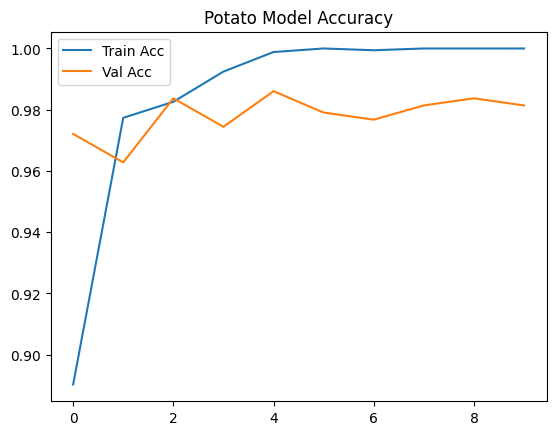

In [2]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Potato Model Accuracy')
plt.show()


Saving images (11).jpeg to images (11) (1).jpeg


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: Potato___Late_blight
Confidence: 99.13%


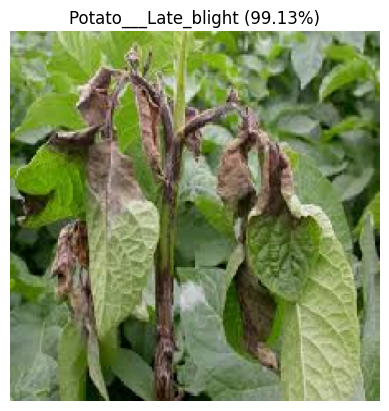

In [9]:
# STEP 1: Upload image from device
from google.colab import files
uploaded = files.upload()

import os
image_path = list(uploaded.keys())[0]  # Get uploaded image file name

# STEP 2: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# STEP 3: Load the trained model
model_path = '/content/drive/MyDrive/savedModels/potato_disease_model.h5'  # Change this to cotton/rice model if needed
model = load_model(model_path)

# STEP 4: Preprocess the uploaded image
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# STEP 5: Predict class
pred = model.predict(img_array)
class_index = np.argmax(pred[0])
confidence = np.max(pred[0]) * 100

# STEP 6: Get class labels (manually define them as in training)
class_labels = ['Potato___Early_blight','Potato___Late_blight','Potato___healthy']  # For potato — adjust for other crops

# STEP 7: Show results
print(f"Predicted class: {class_labels[class_index]}")
print(f"Confidence: {confidence:.2f}%")

# Optional: Show uploaded image
plt.imshow(img)
plt.axis('off')
plt.title(f"{class_labels[class_index]} ({confidence:.2f}%)")
plt.show()


# **TEST CODE**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving potato-leaf-isolated-on-white-260nw-2299088565.webp to potato-leaf-isolated-on-white-260nw-2299088565 (3).webp


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: Potato___healthy
Confidence: 61.96%


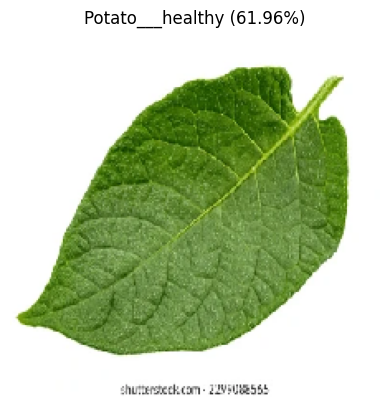

In [11]:
# STEP 1: Mount Google Drive (if needed)
from google.colab import drive
drive.mount('/content/drive')

# STEP 2: Upload image from your device
from google.colab import files
uploaded = files.upload()

import os
image_path = list(uploaded.keys())[0]  # Get uploaded image file name

# STEP 3: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# STEP 4: Load the trained potato model
model = load_model('/content/drive/MyDrive/savedModels/potato_disease_model.h5')  # Update if your path is different

# STEP 5: Preprocess the uploaded image
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# STEP 6: Predict class
pred = model.predict(img_array)
class_index = np.argmax(pred[0])
confidence = np.max(pred[0]) * 100

# STEP 7: Class labels for potato
class_labels = ['Potato___Early_blight','Potato___Late_blight','Potato___healthy']  # Update if your class names are different

# STEP 8: Show results
print(f"Predicted class: {class_labels[class_index]}")
print(f"Confidence: {confidence:.2f}%")

# Display the uploaded image with prediction
plt.imshow(img)
plt.axis('off')
plt.title(f"{class_labels[class_index]} ({confidence:.2f}%)")
plt.show()
